Data generated with MIEvolve.py

In [94]:
# import tensorflow as tf
from functionsTF import *
from functions import *
from IO import *

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt
import seaborn as sns
#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import mutual_info

In [3]:
N = 2000
T = 500

DEVICE = '/gpu:0'

In [4]:
a = tf.ones((10,10), tf.float32)
b = tf.fill((10,10), 1)
c = tf.cast((2.3>3)*b, tf.bool)
tf.select(c,a,a)

NameError: name 'tf' is not defined

In [4]:
scaling = 1 / (1 / (2 * 2 / 0.25)) ** 0.5 * 70
def generateInput3(seed, T, n=None):
    dt = 0.25
    np.random.seed(seed)
    x = np.linspace(0.0, dt*T, T)
    signal = np.zeros(len(x))
    iBack = 0
    for i in range(len(x)):
        iBack = iBack + dt / 10 * (-iBack + np.random.rand()-0.5)
        iEff = iBack * scaling +  20
        signal[i] = iEff
    return signal

0.0151253238003
0.127432402266


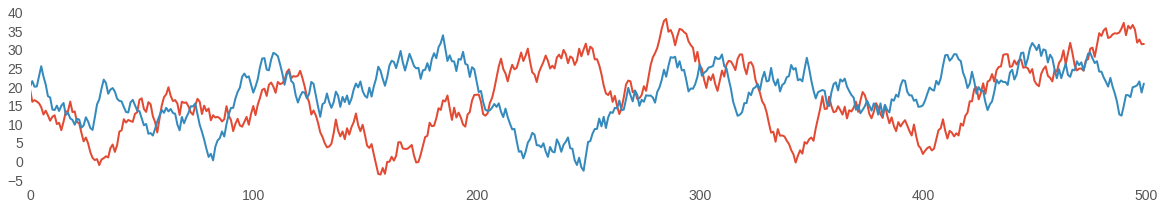

In [5]:
plt.figure(figsize=(20,3))
apple = generateInput3(2, T)
pear = generateInput3(3, T)
plt.plot(apple)
plt.plot(pear)
plt.xlim([0,500])

sigma = 8
print(mutual_info.mutual_information_2d(apple, pear,normalized=True, sigma=sigma))
print(mutual_info.mutual_information_2d(apple, apple+0.3*pear,normalized=True, sigma=sigma))

In [95]:
disp = False
tauv = 45
sG = 0
N = 2000
T= 2000
both=True

### input 1: apple
gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both, g0=7, startPlast=4000)
gpu.spikeMonitor = True
gpu.showProgress = True
apple = generateInput2(2, T)
gpu.input = apple/np.max(apple)*1*0
gpu.input = np.ones(len(apple))*4
gpu.runTFSimul()
apple_out = gpu.vvm[-1000:]

0%                          100%
[##############################] | ETA: 00:00:00

42.41



Total time elapsed: 00:00:42


2.46864743686 2.44918333074


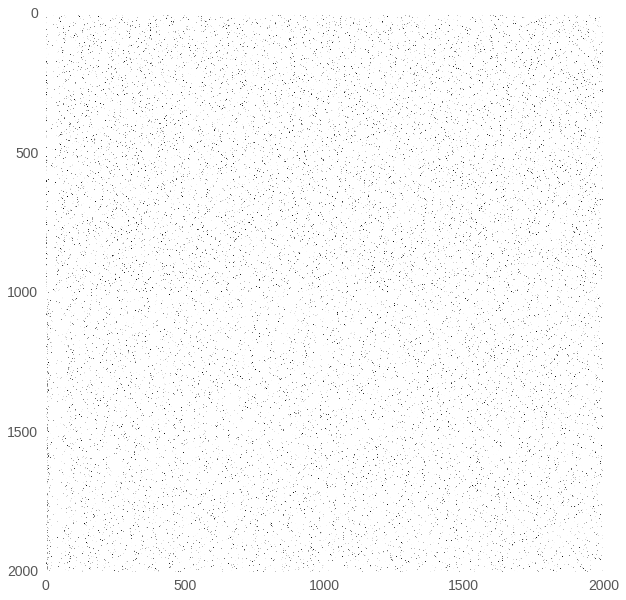

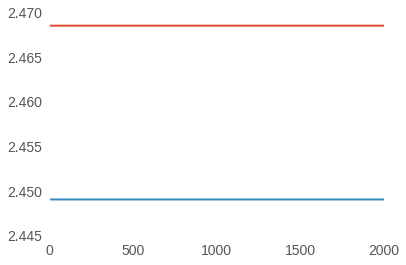

In [96]:
plt.figure(figsize=(10,10))
plt.imshow(gpu.raster.transpose())
plt.savefig(DIRECTORY + 'raster-N_%d-sg_%d-tauv_%d.png'%( N, sG, tauv))
plt.figure()
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)
print(np.mean(gpu.gammaN1), np.mean(gpu.gammaN2))

0.0149963286968
0.00165649647647


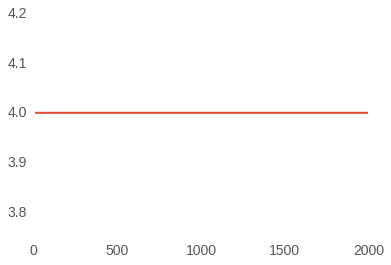

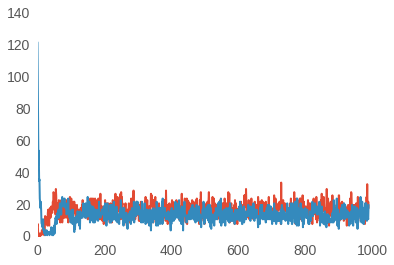

In [18]:
plt.plot(gpu.input)
plt.figure()
plt.plot(gpu.vvmN1[10:1000])
plt.plot(gpu.vvmN2[10:1000])
print(mutual_info.mutual_information_2d((gpu.vvmN1), (gpu.vvmN2)))
print(np.corrcoef(gpu.vvmN1,gpu.vvmN2)[0,1])

In [24]:
fourier(np.array(gpu.vvmN1[100:]))

[130.25210084033614, -11.31709239462916]

In [113]:
disp = False
tauv = 45
sG = 100
N = 1000
both=False
T =500

### input 1: apple
gpu2 = TfEvolveNet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both, startPlast = 9999)
gpu2.spikeMonitor = True
apple = generateInput2(2, T)
gpu2.input = apple*100
gpu2.runTFSimul()
apple_out = gpu2.vvm[-1000:]


3.60



In [111]:
plt.figure(figsize=(10,10))
# plt.imshow(gpu2.raster.transpose())

0.197025887319
0.0528000555845


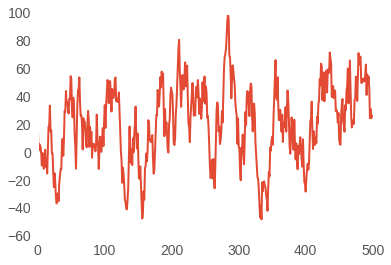

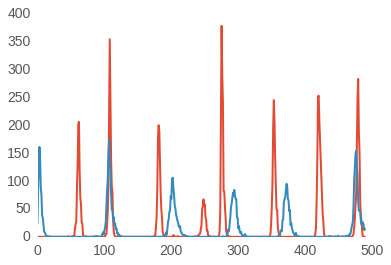

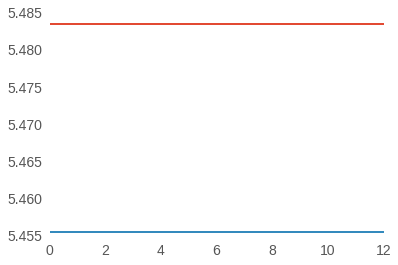

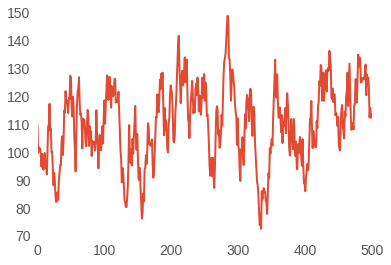

In [112]:
plt.plot(gpu2.input)
plt.figure()
plt.plot(gpu2.vvmN1[10:])
plt.plot(gpu2.vvmN2[10:])
print(mutual_info.mutual_information_2d((gpu2.vvmN1), (gpu2.vvmN2)))
print(np.corrcoef(gpu2.vvmN1,gpu2.vvmN2)[0,1])

plt.figure()
plt.plot(gpu2.gammaN1)
plt.plot(gpu2.gammaN2)
plt.figure()
plt.plot(gpu2.iEff)

In [5]:
# for T in [4000, 8000, 60000]:
#     for both in [True, False]:
#         for N in [400]:
#             for sG in [0,10,20,50]:
#                 for tauv in np.arange(15,95,5):
#                     ### input 1: apple
#                     disp=False
#                     gpu = Tfnet(N=N,T=T, disp=disp, tauv=tauv, sG=sG, device=DEVICE, both=both, spikeMonitor=False)
#                     np.random.seed(2)
#                     gpu.input = apple
#                     gpu.runTFSimul()
#                     apple_out = gpu.vvm[-1000:]

#                     filename = "MI_both-%s_tauv-%d_sg-%d_N-%d_input-%s_T=%d" % (str(both), tauv,sG, N, 'test', T)
#                     with open(filename, 'wb') as f:
#                         np.savez(f,vvmN1 = gpu.vvmN1, vvmN2 = gpu.vvmN2, 
#                                 cor1 = np.corrcoef(gpu.vvmN1[100:1100], gpu.vvmN2[100:1100])[0,1], 
#                                 cor2 = np.corrcoef(gpu.vvmN1[-1001:-1], gpu.vvmN2[-1001:-1])[0,1],
# #                                 mutual_info.mutual_information_2d((gpu.vvmN1[100:1100]), (gpu.vvmN2[100:1100])),
# #                                 mutual_info.mutual_information_2d((gpu.vvmN1[-1001:-1]), (gpu.vvmN2[-1001:-1]))
#                                 )

In [70]:
df = pd.DataFrame(columns=('tauv', 'sG', 'both', 'T', 'N', 'k',
                           'corS_apple', 'corE_apple','corS_pear', 'corE_pear', 'corChange_apple', 'corChange_pear', 
                           'm1s', 'm1e','m2s', 'm2e', 'mChangeN1', 'mChangeN2',
                           'm1s_pear', 'm1e_pear', 'm2s_pear', 'm2e_pear', 'mChangeN1_pear', 'mChangeN2_pear',
                          'mBaseline_s', 'mBaseline_e', 'mBaseline_change',
                          'mBaseline_s_N2', 'mBaseline_e_N2', 'mBaseline_change_N2',
                          'mInter_s', 'mInter_e', 'mInter_change',
                          'mInput1_s', 'mInput1_e', 'mInput1_change',
                          'mInput2_s', 'mInput2_e', 'mInput2_change',
                          'm2s_avg', 'm2e_avg', 'mChangeN2_avg', 
                           'g1N1s', 'g1N1e', 'g1N1change',
                           'g1N2s', 'g1N2e', 'g1N2change', 
                           'mInter_changePlast', 'mInter_changeConn'
                          ) )
i=-1
d = 500
start = 8001
sigma = 8
for T in [16000]:
    apple = generateInput2(2, T)
    pear = generateInput2(3, T)
    for both in [ False, True]:
        for N in [2000]:
            for sG in [0, 20, 100, 200]:
                for tauv in np.arange(15,90,20):
                    for k in [100]:
#                     try:
                        i+=1
                        filename = "MIEvolvePlast5-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d" % (str(both), tauv,sG, N, 'noise', T)
                        filename = "MIEvolvePlast5-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)
#                         filename = "MIEvolveNoPlast5-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)

                        a = np.load(filename)
                        cor1 = np.corrcoef(a['vvmN1'][start:start+d], a['vvmN2'][start:start+d])[0,1]
                        cor2 = np.corrcoef(a['vvmN1'][T-d:T], a['vvmN2'][T-d:T])[0,1]
                        cor1_2 = np.corrcoef(a['vvmN1_2'][start:start+d], a['vvmN2_2'][start:start+d])[0,1]
                        cor2_2 = np.corrcoef(a['vvmN1_2'][T-d:T], a['vvmN2_2'][T-d:T])[0,1]
                        corChange = cor2/cor1
                        corChange_2 = cor2_2/cor1_2
                        
                        g1N1s = np.mean(a['g1N1'][start//40:(start+d)//40])
                        g1N1e = np.mean(a['g1N1'][(T-d)//40:(T)//40])
                        g1N2s = np.mean(a['g1N2'][start//40:(start+d)//40])
                        g1N2e = np.mean(a['g1N2'][(T-d)//40:(T)//40])
                        
                        g1N1change = g1N1e/g1N1s
                        g1N2change = g1N2e/g1N2s

                        # m1x: MI between apple input and output network 1 with apple input
                        m1s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (a['vvmN1'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN1'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        # m2x: MI between apple input and output network 2 with apple input
                        m2s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (a['vvmN2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1 = m1e/m1s
                        mChangeN2 = m2e/m2s
                        
                        # m1x_pear: MI between pear input and output network 1 with pear input
                        m1s_pear = float(mutual_info.mutual_information_2d((pear[start:start+d]), (a['vvmN1_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m1e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN1_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        # m2x_pear: MI between pear input and output network 2 with pear input
                        m2s_pear = float(mutual_info.mutual_information_2d((pear[start:start+d]), (a['vvmN2_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        m2e_pear = float(mutual_info.mutual_information_2d((pear[T-d:T]), (a['vvmN2_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))
                        mChangeN1_pear = m1e_pear/m1s_pear
                        mChangeN2_pear = m2e_pear/m2s_pear
                        
                        # m2x_pear+apple avg: MI between pear input and output network 2 with pear input
                        m2s_avg = (m2s+m2s_pear)/2
                        m2e_avg = (m2e+m2e_pear)/2
                        mChangeN2_avg = m2e_avg/m2s_avg

                        
                        
                        # mBaseline: MI between pear input and output network 1 with pear input
                        mBaseline_s = float(mutual_info.mutual_information_2d((apple[start:start+d]), (a['vvmN1_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mBaseline_e = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN1_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mBaseline_change = mBaseline_e/mBaseline_s
                        
                        # mBaseline: MI between pear input and output network 1 with pear input
                        mBaseline_s_N2 = float(mutual_info.mutual_information_2d((apple[start:start+d]), (a['vvmN2_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mBaseline_e_N2 = float(mutual_info.mutual_information_2d((apple[T-d:T]), (a['vvmN2_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mBaseline_change_N2 = mBaseline_e_N2/mBaseline_s_N2
                        
                        # mInter: inter coherence
                        mInter_s0 = float(mutual_info.mutual_information_2d((a['vvmN1'][7000:7000+d]), (a['vvmN2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInter_s = float(mutual_info.mutual_information_2d((a['vvmN1'][start:start+d]), (a['vvmN2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInter_e = float(mutual_info.mutual_information_2d((a['vvmN1'][T-d:T]), (a['vvmN2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInter_change = mInter_e/mInter_s
                        mInter_changePlast = (mInter_e - mInter_s)/(mInter_e - mInter_s0)
                        mInter_changeConn = (mInter_s - mInter_s0)/(mInter_e - mInter_s0)
                        
                        
                        # mInput: test coherence after presenting different inputs
                        mInput1_s = float(mutual_info.mutual_information_2d((a['vvmN1'][start:start+d]), (a['vvmN1_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInput1_e = float(mutual_info.mutual_information_2d((a['vvmN1'][T-d:T]), (a['vvmN1_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInput1_change = mInput1_e/mInput1_s
                        
                        mInput2_s = float(mutual_info.mutual_information_2d((a['vvmN2'][start:start+d]), (a['vvmN2_2'][start:start+d]), 
                                                                     normalized=False, sigma=sigma) )
                        mInput2_e = float(mutual_info.mutual_information_2d((a['vvmN2'][T-d:T]), (a['vvmN2_2'][T-d:T]), 
                                                                    normalized=False, sigma=sigma))

                        mInput2_change = mInput2_e/mInput2_s

                        
    #                     df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), float(a['cor1']), float(a['cor2']) ]
                        df.loc[i] = [int(tauv), int(sG), bool(both), int(T), int(N), int(k),
                                     cor1, cor2, cor1_2, cor2_2,
                                     corChange, corChange_2, 
                                     m1s, m1e, m2s, m2e, mChangeN1, mChangeN2,
                                     m1s_pear, m1e_pear, m2s_pear, m2e_pear, mChangeN1_pear, mChangeN2_pear,
                                    mBaseline_s, mBaseline_e, mBaseline_change,
                                    mBaseline_s_N2, mBaseline_e_N2, mBaseline_change_N2,
                                    mInter_s, mInter_e, mInter_change,
                                    mInput1_s, mInput1_e, mInput1_change,
                                    mInput2_s, mInput2_e, mInput2_change,
                                    m2s_avg, m2e_avg, mChangeN2_avg, 
                                    g1N1s, g1N1e, g1N1change,
                                   g1N2s, g1N2e, g1N2change, 
                                    mInter_changePlast, mInter_changeConn]
#                     except:
#                         pass

In [97]:
both = False
tauv=45
sG = 100
N = 2000
T = 20
apple = generateInput2(2, T)
pear = generateInput2(3, T)

### input 1: apple
gpu1 = TfEvolveNet(N=N, T=T, disp=False, tauv=tauv, sG=sG, device='/gpu:0',
             both=both, spikeMonitor=False, startPlast=10000)
gpu1.input = apple*10
gpu1.initWGap = True
gpu1.disp = False
gpu1.showProgress = True
gpu1.runTFSimul()



0.32



In [72]:
# plt.plot(gpu1.vvmN1[:])
# plt.plot(gpu1.vvmN2[:])
# plt.figure()
# plt.plot(gpu1.gammaN1)
# plt.plot(gpu1.gammaN2)
# plt.figure()
# plt.plot(gpu1.iEff)

In [73]:
# float(mutual_info.mutual_information_2d(gpu1.vvmN1, gpu1.vvmN2, normalized=False, sigma=1) )

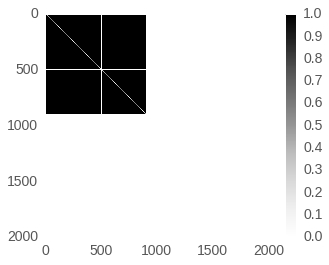

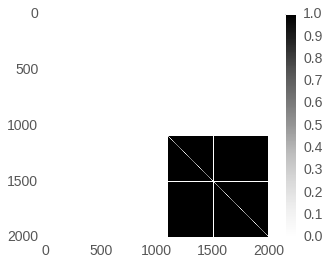

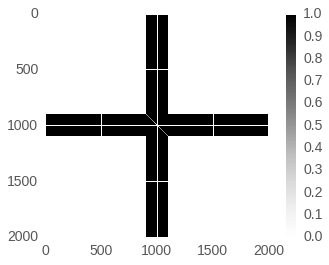

In [98]:
plt.imshow(gpu1.conn1)
plt.colorbar()
plt.figure()
plt.imshow(gpu1.conn2)
plt.colorbar()
plt.figure()
plt.imshow(gpu1.connS)
plt.colorbar()

In [75]:
# F = 10
# both = False
# tauv=45
# sG = 50
# N = 2000
# T = 1200
# apple = generateInput2(2, T)


# ### input 1: apple
# gpu = Tfnet(N=N, T=T, disp=False, tauv=tauv, device='/gpu:0',
#               spikeMonitor=False, startPlast=0, NUM_CORES=56, g0=7)
# gpu.g0fromFile = False
# gpu.input = apple*10
# gpu.initWGap = True
# gpu.disp = False
# gpu.showProgress = True
# gpu.runTFSimul()


In [76]:
# plt.plot(gpu1.vvm[:1000])
# plt.figure()
# plt.plot(gpu1.gamma[:1000])
# np.mean(gpu1.gamma[-1000:])
# plt.figure()
# plt.plot(gpu1.iEff)

In [77]:
# filename = "GetSteadyState2-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, 7, N, 4000, 5)
# a = np.load(filename)
# plt.plot(a['gamma'][:2000])
# np.mean(a['gamma'][-1000:])

In [78]:
# getGSteady(tauv,5,1000)

In [79]:
# sG = 0
# both = False
# tauv = 15
# T=16000
# N=2000
# k = 100
# filename = "MIEvolvePlast5-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d_k-%d" % (str(both), tauv,sG, N, 'noise', T, k)
# a = np.load(filename)
# start = -2000
# stop = None
# plt.figure(figsize=(12,3))
# plt.plot(a['vvmN1'][start:stop])
# plt.plot(a['vvmN2'][start:stop])
# plt.figure()
# plt.plot(a['g1N1'])
# plt.plot(a['g2N2'])

# # filename = "MIEvolveNoPlast3-both-%s_tauv-%d_sg-%d_N-%d_input-%s_T-%d" % (str(both), tauv,sG, N, 'noise', T)
# # a = np.load(filename)
# # start = -1000
# # stop = None
# # plt.figure()
# # plt.plot(a['vvmN1'][start:stop])
# # plt.plot(a['vvmN2'][start:stop])
# # plt.figure()
# # plt.plot(a['g1N1'])
# # plt.plot(a['g2N2'])

In [80]:
df0 = df.copy()
df = df0[df0['k']==100]
df.head()

,tauv,sG,both,T,N,k,corS_apple,corE_apple,corS_pear,corE_pear,...,m2e_avg,mChangeN2_avg,g1N1s,g1N1e,g1N1change,g1N2s,g1N2e,g1N2change,mInter_changePlast,mInter_changeConn
0,15.0,0.0,False,16000.0,2000.0,100.0,-0.072412,0.004345,0.020119,-0.100958,...,0.103501,1.142481,4.562503,4.598595,1.007911,5.571470,5.276028,0.946972,2.010524,-1.010524
1,35.0,0.0,False,16000.0,2000.0,100.0,0.038035,-0.048139,0.069396,0.051647,...,0.156938,1.808976,4.529575,4.641032,1.024607,5.781263,5.610818,0.970518,2.197257,-1.197257
2,55.0,0.0,False,16000.0,2000.0,100.0,0.038434,-0.012240,0.083348,-0.146678,...,0.123775,1.202555,4.561508,4.608946,1.010400,5.889945,5.836956,0.991004,-0.135576,1.135576
3,75.0,0.0,False,16000.0,2000.0,100.0,0.530951,0.074626,0.018217,-0.077572,...,0.123690,1.130603,4.554004,4.638913,1.018645,5.967378,5.999431,1.005371,13.684381,-12.684381
4,15.0,20.0,False,16000.0,2000.0,100.0,-0.073404,0.011948,-0.079171,0.152562,...,0.084808,0.973989,4.598905,4.641829,1.009333,5.601008,5.303880,0.946951,0.335398,0.664602


In [81]:
# df.to_csv(DIRECTORY + 'MIEvolvePlast4.csv')

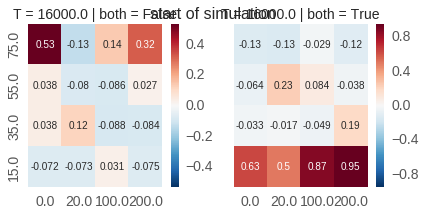

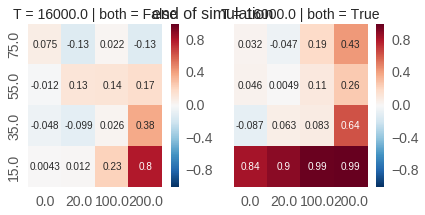

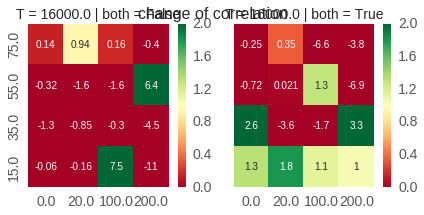

In [82]:
df.fillna(0)
cols = ['corS_apple', 'corE_apple','corChange_apple']
plotGrid(df, 'corS_apple', 'start of simulation', cmap="RdBu_r", cols=cols)
plotGrid(df, 'corE_apple', 'end of simulation', cmap="RdBu_r", vmin=-.1, vmax=1.0, cols=cols)
plotGrid(df, 'corChange_apple', 'change of correlation',  cmap="RdYlGn", norm=MidpointNormalize(midpoint=1.), vmin=0, vmax=2, cols=cols)

In [83]:
vmin = 0.4
vmax = 0.8
vminc = 0.8
vmaxc = 2.7
vmin, vmax, vminc, vmaxc = None,None,None,None

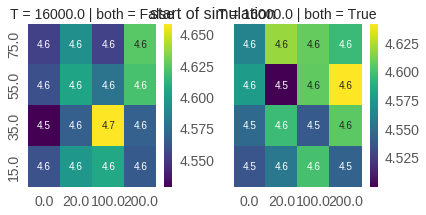

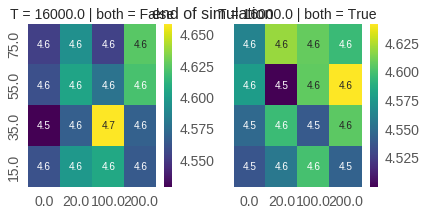

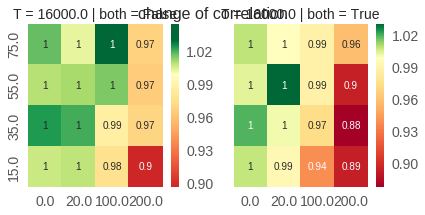

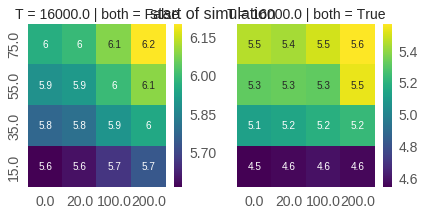

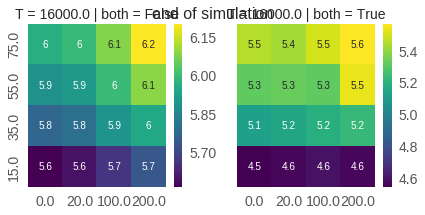

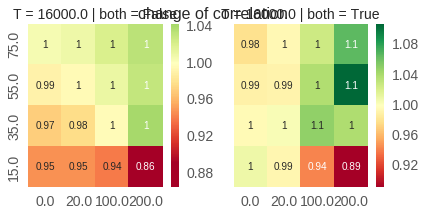

In [84]:
plotGrid(df, 'g1N1s', 'start of simulation', cmap="viridis", cols = ['g1N1s', 'g1N1e', 'g1N1change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'g1N1s', 'end of simulation', cmap="viridis", cols = ['g1N1s', 'g1N1e', 'g1N1change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'g1N1change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['g1N1s', 'g1N1e', 'g1N1change'], vmin=vminc, vmax=vmaxc)

plotGrid(df, 'g1N2s', 'start of simulation', cmap="viridis", cols = ['g1N2s', 'g1N2e', 'g1N2change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'g1N2s', 'end of simulation', cmap="viridis", cols = ['g1N2s', 'g1N2e', 'g1N2change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'g1N2change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['g1N2s', 'g1N2e', 'g1N2change'], vmin=vminc, vmax=vmaxc)

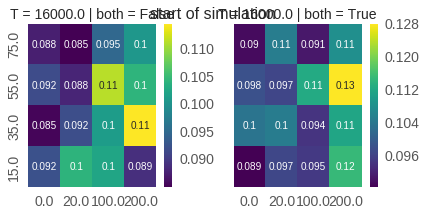

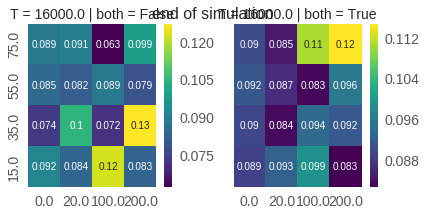

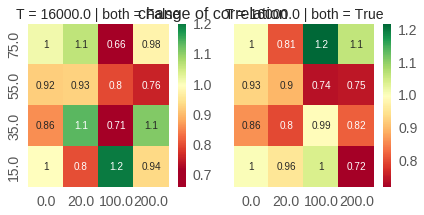

In [85]:
plotGrid(df, 'm1s', 'start of simulation', cmap="viridis", cols = ['m1s', 'm1e', 'mChangeN1'], vmin=vmin, vmax=vmax)
plotGrid(df, 'm1e', 'end of simulation', cmap="viridis", cols = ['m1s', 'm1e', 'mChangeN1'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mChangeN1', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m1s', 'm1e', 'mChangeN1'], vmin=vminc, vmax=vmaxc)

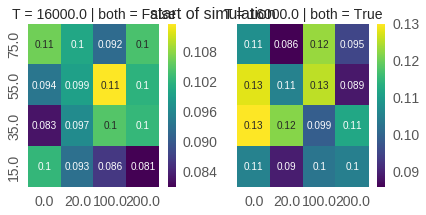

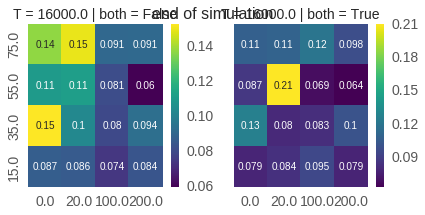

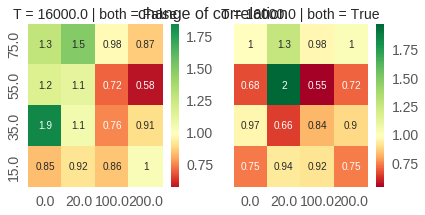

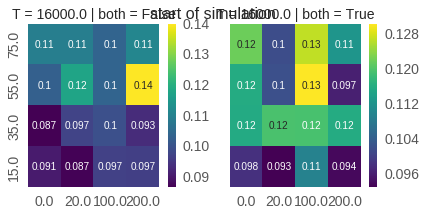

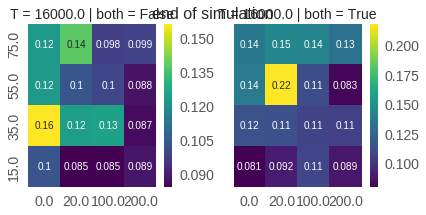

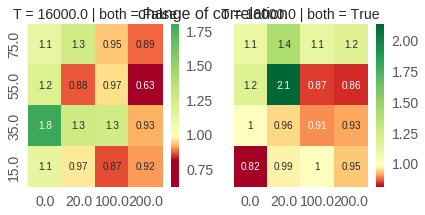

In [86]:
plotGrid(df, 'm2s', 'start of simulation', cmap="viridis", cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vmin, vmax=vmax)
plotGrid(df, 'm2e', 'end of simulation', cmap="viridis", cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mChangeN2', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m2s', 'm2e', 'mChangeN2'], vmin=vminc, vmax=vmaxc)

plotGrid(df, 'm2s_avg', 'start of simulation', cmap="viridis", cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vmin, vmax=vmax)
plotGrid(df, 'm2e_avg', 'end of simulation', cmap="viridis", cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mChangeN2_avg', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['m2s_avg', 'm2e_avg', 'mChangeN2_avg'], vmin=vminc, vmax=vmaxc)

## BASELINES
* Coherence between S1 and O_N1(S2)
* Coherence between S1 and O_N2(S2)

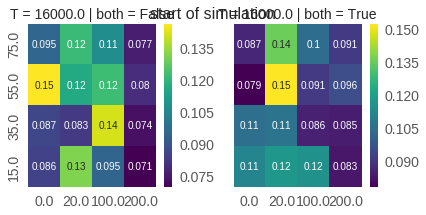

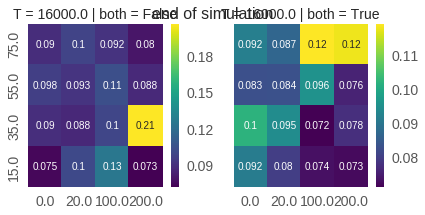

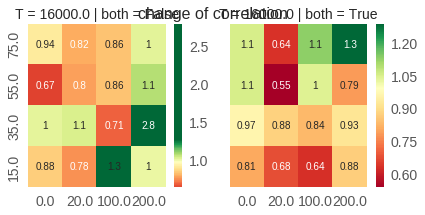

In [87]:
# vmin=None
# vmax=None
# vminc=None
# vmaxc=None
plotGrid(df, 'mBaseline_s', 'start of simulation', cmap="viridis", cols = ['mBaseline_s', 'mBaseline_e', 'mBaseline_change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mBaseline_e', 'end of simulation', cmap="viridis", cols = ['mBaseline_s', 'mBaseline_e', 'mBaseline_change'], vmin=vmin, vmax=vmax)
plotGrid(df, 'mBaseline_change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = ['mBaseline_s', 'mBaseline_s', 'mBaseline_change'], vmin=vminc, vmax=vmaxc)

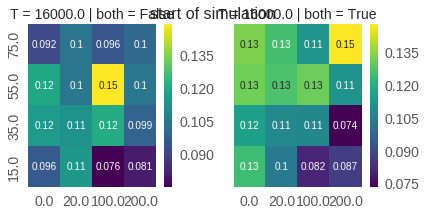

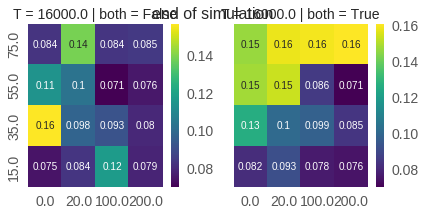

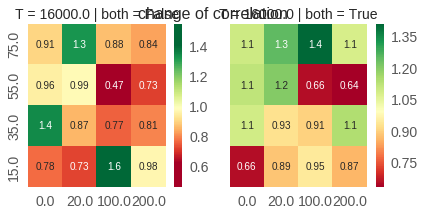

In [88]:
# vmin=None
# vmax=None
# vminc=None
# vmaxc=None
cols = ['mBaseline_s_N2', 'mBaseline_e_N2', 'mBaseline_change_N2']
plotGrid(df, 'mBaseline_s_N2', 'start of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mBaseline_e_N2', 'end of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mBaseline_change_N2', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=vminc, vmax=vmaxc)

## MI after presenting different inputs
* O_N1(S1) <-> O_N1(S2)
* O_N2(S1) <-> O_N2(S2)

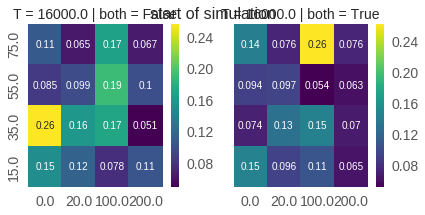

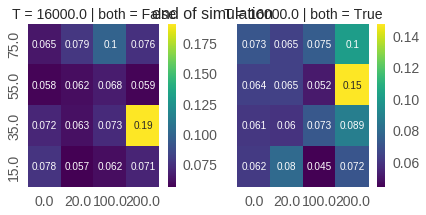

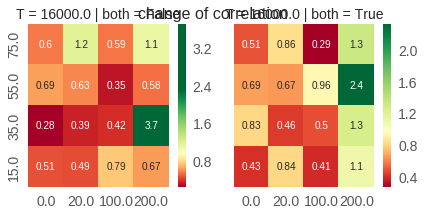

In [89]:
cols = ['mInput1_s', 'mInput1_e', 'mInput1_change']
plotGrid(df, 'mInput1_s', 'start of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInput1_e', 'end of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInput1_change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=vminc, vmax=vmaxc)

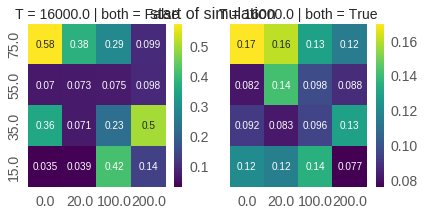

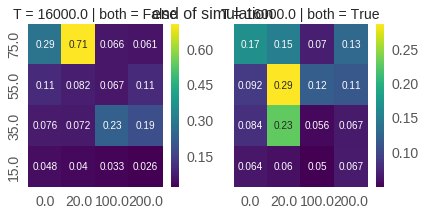

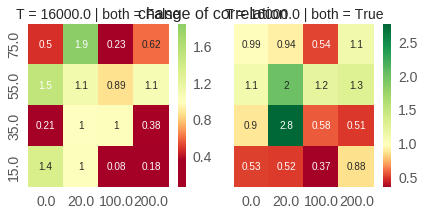

In [90]:
cols = ['mInput2_s', 'mInput2_e', 'mInput2_change']
plotGrid(df, 'mInput2_s', 'start of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInput2_e', 'end of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInput2_change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=vminc, vmax=vmaxc)

## Coherence between N1 and N2

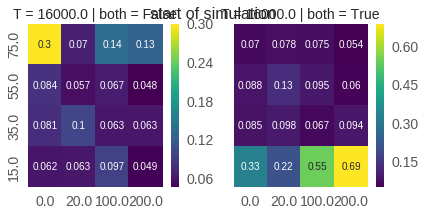

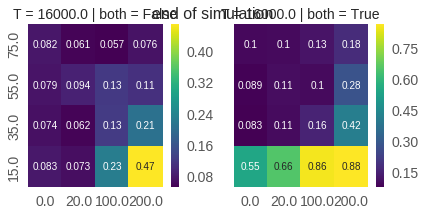

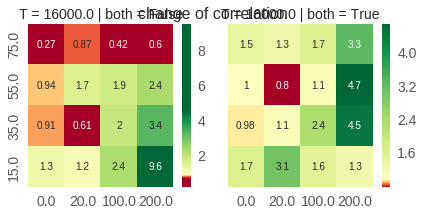

In [91]:
cols = ['mInter_s', 'mInter_e', 'mInter_change']
plotGrid(df, 'mInter_s', 'start of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInter_e', 'end of simulation', cmap="viridis", cols = cols, vmin=vmin, vmax=vmax)
plotGrid(df, 'mInter_change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=vminc, vmax=vmaxc)

## MI from connection and MI from plasticity

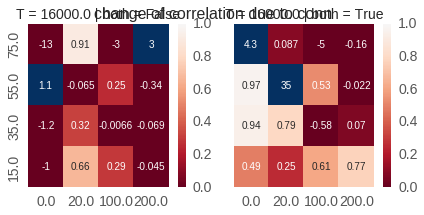

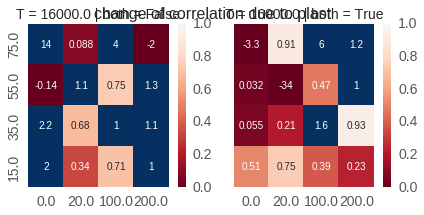

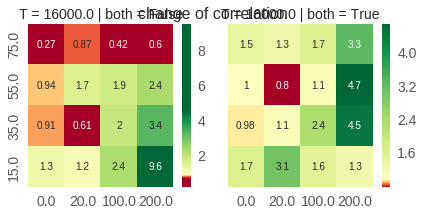

In [92]:
cols = ['mInter_change', 'mInter_changeConn', 'mInter_changePlast']
plotGrid(df, 'mInter_changeConn', 'change of correlation due to conn',  cmap="RdBu", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=0, vmax=1)
plotGrid(df, 'mInter_changePlast', 'change of correlation due to plast',  cmap="RdBu", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=0, vmax=1)
plotGrid(df, 'mInter_change', 'change of correlation',  cmap="RdYlGn", 
         norm=MidpointNormalize(midpoint=1.), cols = cols, vmin=vminc, vmax=vmaxc)

## Fourier

/mnt/DATA/gp1514/Projects/github/cortex/notebooks/functions.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  plt.plot(xf, 2.0/dt * np.abs(yf[0:T/2]))


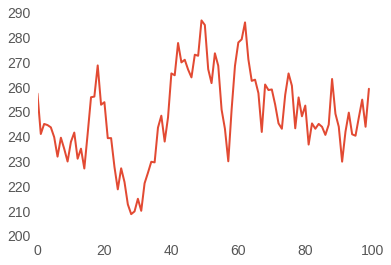

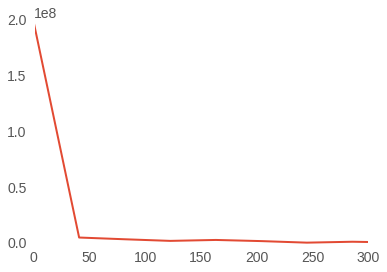

In [37]:
T = 100
apple = generateInput2(2, T, 10)
plt.plot(apple)
plt.savefig(DIRECTORY + 'apple.png')
plotFFT(apple, T)
plt.savefig(DIRECTORY + 'appleFFT.png')

/mnt/DATA/gp1514/Projects/github/cortex/notebooks/functions.py:186: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  plt.plot(xf, 2.0/dt * np.abs(yf[0:T/2]))


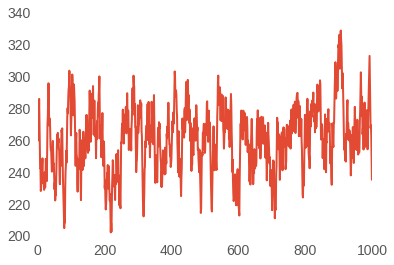

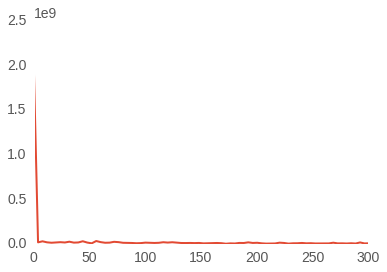

In [42]:
T = 1000
apple = generateInput2(3, T, 10)
plt.plot(apple)
plt.savefig(DIRECTORY + 'pear.png')
plotFFT(apple, T)
plt.savefig(DIRECTORY + 'pearFFT.png')

In [19]:
H, xedges, yedges = np.histogram2d(gpu.vvmN1, gpu.vvmN2, bins=(256,256))
im = plt.imshow(H, interpolation='nearest', origin='low',
                extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

NameError: name 'gpu' is not defined

In [ ]:
apple = generateInput(3, T, 10)
pear = generateInput(3, T, 10)

# apple=np.random.randn(2,50000)
# pear = apple*2
mutual_info.mutual_information_2d(apple.ravel(),pear.ravel(), normalized=1)

In [ ]:
mod15 = resonanceFS(tauv=30)
F = np.logspace(0.5, 2.3, 200)
plt.semilogx(F, mod15/ np.nanmax(mod15), label='%.1f' % (F[np.argmax(mod15)]), color='c')
plt.legend()

In [ ]:
plt.plot(np.fft.rfft(generateInput(2, T, 60)))
plt.plot(np.fft.rfft(generateInput(3, T, 60)))
plt.xlim([0,4000])

In [ ]:
dt = 0.25
x = np.linspace(0.0, dt*T, T)
applefft = np.fft.rfft(generateInput(2, T, 60))
plt.plot(x[:len(applefft)],applefft)
plt.xlim([0,1000])
